# Section B 

# 10.1

In [1]:
#Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt ## plots
import seaborn as sns ## generates enhanced plots
import statistics
from scipy import stats
import warnings
warnings.filterwarnings("ignore")
import statsmodels.api as sm

In [2]:
df = pd.read_csv("China_Oilfield.csv")
df.head()

,year,y,x1,x2,x3,x4,x5,x6,x7,x8
0,1983,1442800,689,612,311,2375900,41.80,1.45,9.07,1421900
1,1984,1417200,855,720,351,2305000,42.33,1.53,9.54,1442800
2,1985,1466100,1028,874,426,2765900,42.93,1.60,9.49,1417200
3,1986,1454500,1268,1087,472,3306400,46.21,1.55,10.25,1466100
4,1987,1489400,1446,1197,652,3981400,45.80,1.49,9.35,1454500


In [3]:
df.describe() #Descriptive statistics of the data

,year,y,x1,x2,x3,x4,x5,x6,x7,x8
count,24.000000,2.400000e+01,24.000000,24.000000,24.000000,2.400000e+01,24.000000,24.000000,24.000000,2.400000e+01
mean,1994.500000,3.949742e+06,4474.916667,3487.958333,859.916667,1.254121e+07,60.349167,1.160417,13.166667,3.608029e+06
std,7.071068,2.513695e+06,3371.137983,2883.126224,487.336141,8.680148e+06,11.444300,0.258633,3.201741,2.252834e+06
min,1983.000000,1.417200e+06,689.000000,612.000000,311.000000,2.305000e+06,41.800000,0.830000,9.070000,1.417200e+06
25%,1988.750000,1.629025e+06,1845.250000,1497.250000,482.750000,5.089575e+06,48.925000,0.905000,9.982500,1.541750e+06
50%,1994.500000,3.609450e+06,3795.000000,2852.000000,731.500000,1.147070e+07,63.255000,1.145000,13.265000,3.259200e+06
75%,2000.250000,4.835625e+06,5556.250000,3548.750000,1043.250000,1.709108e+07,71.880000,1.385000,15.980000,4.665400e+06
max,2006.000000,9.623000e+06,12314.000000,11092.000000,2347.000000,3.298700e+07,72.950000,1.600000,17.740000,9.051000e+06


In [4]:
df.isnull().any(axis=0).sum() # No columns with missing data

0

In [5]:
df[df.isna().any(axis = 1)] # No rows with missing data

,year,y,x1,x2,x3,x4,x5,x6,x7,x8


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   year    24 non-null     int64  
 1   y       24 non-null     int64  
 2   x1      24 non-null     int64  
 3   x2      24 non-null     int64  
 4   x3      24 non-null     int64  
 5   x4      24 non-null     int64  
 6   x5      24 non-null     float64
 7   x6      24 non-null     float64
 8   x7      24 non-null     float64
 9   x8      24 non-null     int64  
dtypes: float64(3), int64(7)
memory usage: 2.0 KB


In [7]:
print("The number of rows is %d" %(df.shape[0]))
print("The number of columns is %d" %(df.shape[1]))

The number of rows is 24
The number of columns is 10


In [8]:
df.columns

Index(['year', 'y', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8'], dtype='object')

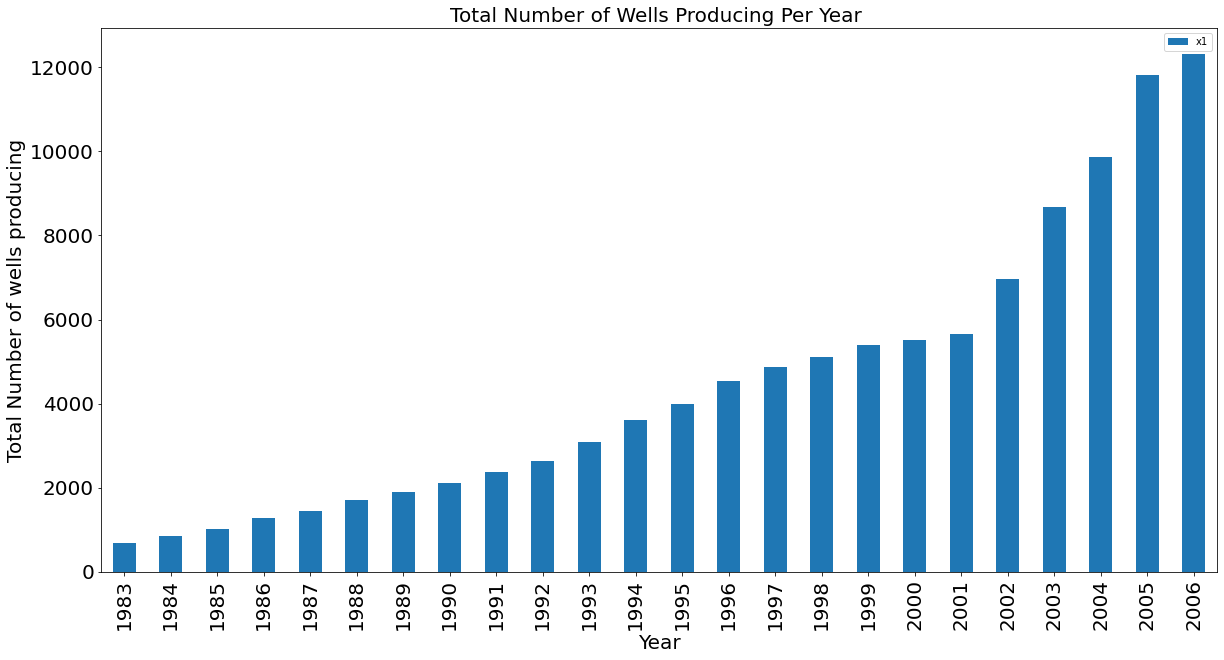

In [9]:
fig, ax = plt.subplots(figsize=(20,10))

# Make Plot using Pandas Plot
df[["x1","year"]].groupby(["year"]).sum().plot(ax = ax, kind = "bar", fontsize = 20)

# Set Plot Properties 
ax.set_ylabel("Total Number of wells producing", fontsize = 20)
ax.set_xlabel("Year", fontsize = 20)

ax.set_title("Total Number of Wells Producing Per Year ", fontsize = 20)

plt.show()

As clearly visible from the graph, the total number of wells producing continuously increased.

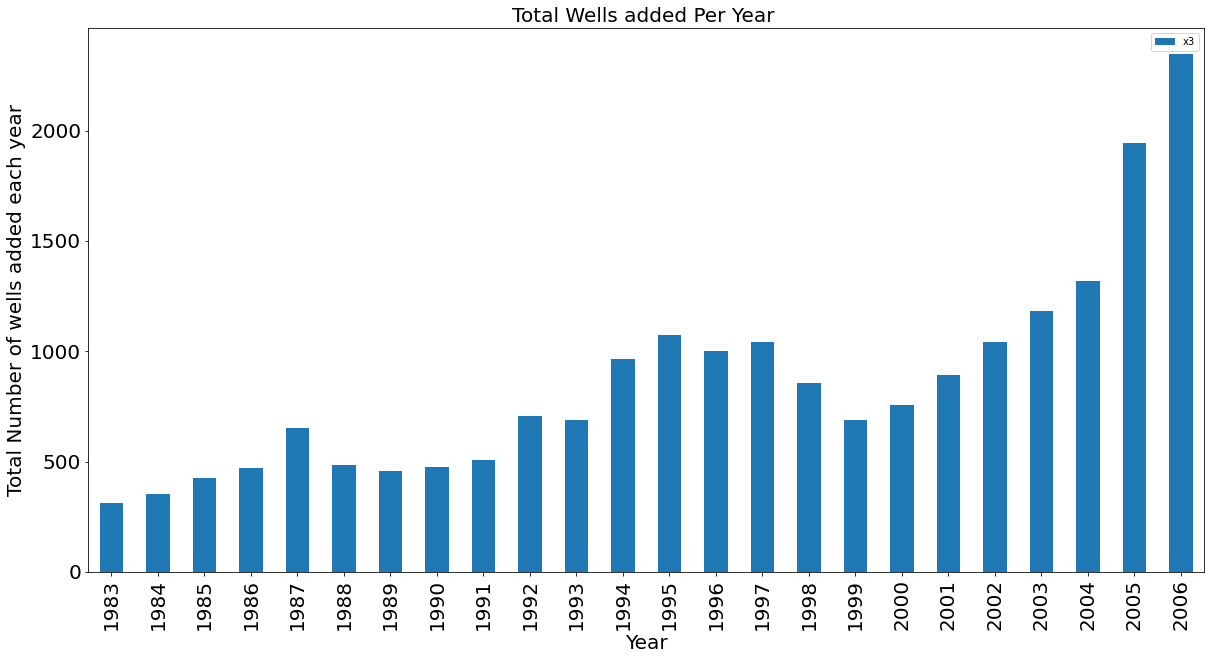

In [10]:
fig, ax = plt.subplots(figsize=(20,10))

# Make Plot using Pandas Plot
df[["x3","year"]].groupby(["year"]).sum().plot(ax = ax, kind = "bar", fontsize = 20)

# Set Plot Properties 
ax.set_ylabel("Total Number of wells added each year", fontsize = 20)
ax.set_xlabel("Year", fontsize = 20)

ax.set_title("Total Wells added Per Year ", fontsize = 20)

plt.show()

In [11]:
df

,year,y,x1,x2,x3,x4,x5,x6,x7,x8
0,1983,1442800,689,612,311,2375900,41.80,1.45,9.07,1421900
1,1984,1417200,855,720,351,2305000,42.33,1.53,9.54,1442800
2,1985,1466100,1028,874,426,2765900,42.93,1.60,9.49,1417200
3,1986,1454500,1268,1087,472,3306400,46.21,1.55,10.25,1466100
4,1987,1489400,1446,1197,652,3981400,45.80,1.49,9.35,1454500
5,1988,1559200,1705,1417,486,4551000,47.80,1.43,9.08,1489400
6,1989,1652300,1892,1524,458,5269100,49.30,1.31,9.31,1559200
7,1990,2024600,2113,1761,473,6020400,52.15,1.37,10.13,1652300
8,1991,2175900,2372,1903,506,7406200,55.46,1.26,10.88,2024600
9,1992,2606400,2640,2123,705,8676500,59.83,1.18,11.54,2175900


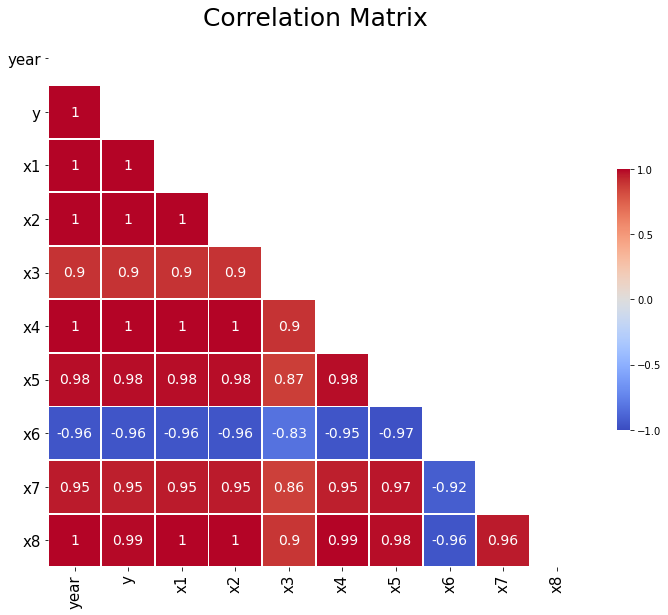

In [12]:
corr_matrix = df.corr(method = "spearman")
mask = np.zeros_like(corr_matrix, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

fig, ax = plt.subplots(figsize=(12, 12))


# Using Seaborn HeatMap
sns.heatmap(corr_matrix, mask = mask, square = True, linewidths = .8, cbar_kws = {'shrink': .4,  'ticks' : [-1, -.5, 0, 0.5, 1]},
            cmap = 'coolwarm', vmin = -1,  vmax = 1, annot = True, annot_kws = {'size': 14})

# Setting Axis Properties
ax.set_yticklabels(corr_matrix.columns, rotation = 0, size = 15)
ax.set_xticklabels(corr_matrix.columns, rotation = 90, size =15)
ax.set_title("Correlation Matrix", size = 25)

sns.set_style({'xtick.bottom': True}, {'ytick.left': True})

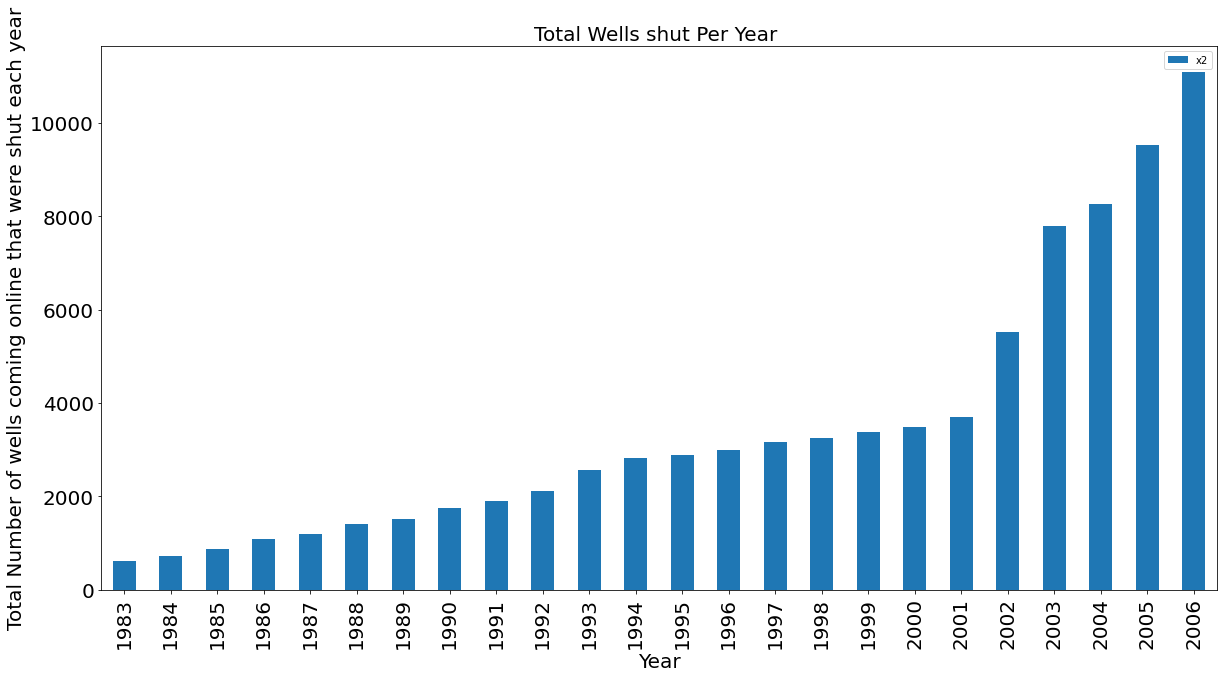

In [13]:
fig, ax = plt.subplots(figsize=(20,10))

# Make Plot using Pandas Plot
df[["x2","year"]].groupby(["year"]).sum().plot(ax = ax, kind = "bar", fontsize = 20)

# Set Plot Properties 
ax.set_ylabel("Total Number of wells coming online that were shut each year", fontsize = 20)
ax.set_xlabel("Year", fontsize = 20)

ax.set_title("Total Wells shut Per Year ", fontsize = 20)

plt.show()

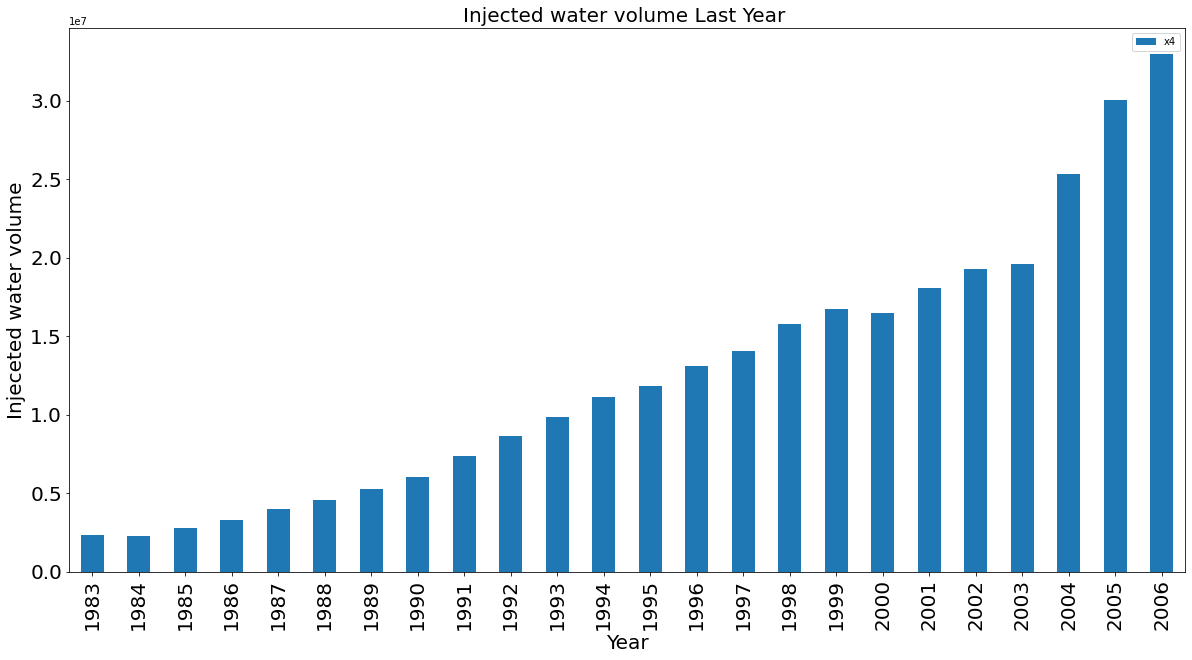

In [14]:
fig, ax = plt.subplots(figsize=(20,10))

# Make Plot using Pandas Plot
df[["x4","year"]].groupby(["year"]).sum().plot(ax = ax, kind = "bar", fontsize = 20)

# Set Plot Properties 
ax.set_ylabel("Injeceted water volume", fontsize = 20)
ax.set_xlabel("Year", fontsize = 20)

ax.set_title("Injected water volume Last Year ", fontsize = 20)

plt.show()

# 10.2

In [15]:
df1 = df[(df['year']>1982) & (df['year']<2000)]
df1

,year,y,x1,x2,x3,x4,x5,x6,x7,x8
0,1983,1442800,689,612,311,2375900,41.80,1.45,9.07,1421900
1,1984,1417200,855,720,351,2305000,42.33,1.53,9.54,1442800
2,1985,1466100,1028,874,426,2765900,42.93,1.60,9.49,1417200
3,1986,1454500,1268,1087,472,3306400,46.21,1.55,10.25,1466100
4,1987,1489400,1446,1197,652,3981400,45.80,1.49,9.35,1454500
5,1988,1559200,1705,1417,486,4551000,47.80,1.43,9.08,1489400
6,1989,1652300,1892,1524,458,5269100,49.30,1.31,9.31,1559200
7,1990,2024600,2113,1761,473,6020400,52.15,1.37,10.13,1652300
8,1991,2175900,2372,1903,506,7406200,55.46,1.26,10.88,2024600
9,1992,2606400,2640,2123,705,8676500,59.83,1.18,11.54,2175900


In [16]:
print('Shape of dataset:  ' , df1.shape) #Shape of dataset

Shape of dataset:   (17, 10)


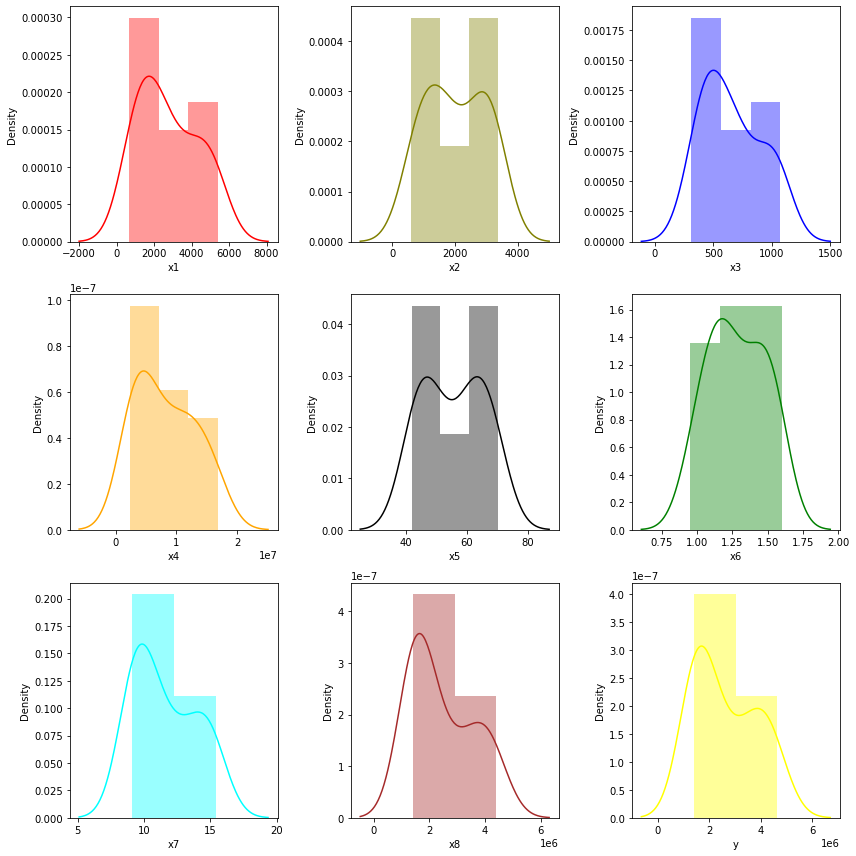

In [17]:
#let’s visualize the distribution of each parameter
f, axes = plt.subplots(3, 3, figsize=(12, 12))
sns.distplot(df1['x1'] , color="red", ax=axes[0, 0])
sns.distplot(df1['x2'] , color="olive", ax=axes[0, 1])
sns.distplot(df1['x3'] , color="blue", ax=axes[0, 2])
sns.distplot(df1['x4'] , color="orange", ax=axes[1, 0])
sns.distplot(df1['x5'] , color="black", ax=axes[1, 1])
sns.distplot(df1['x6'] , color="green", ax=axes[1, 2])
sns.distplot(df1['x7'] , color="cyan", ax=axes[2, 0])
sns.distplot(df1['x8'] , color="brown", ax=axes[2, 1])
sns.distplot(df1['y'],color="yellow", ax=axes[2,2])

plt.tight_layout()

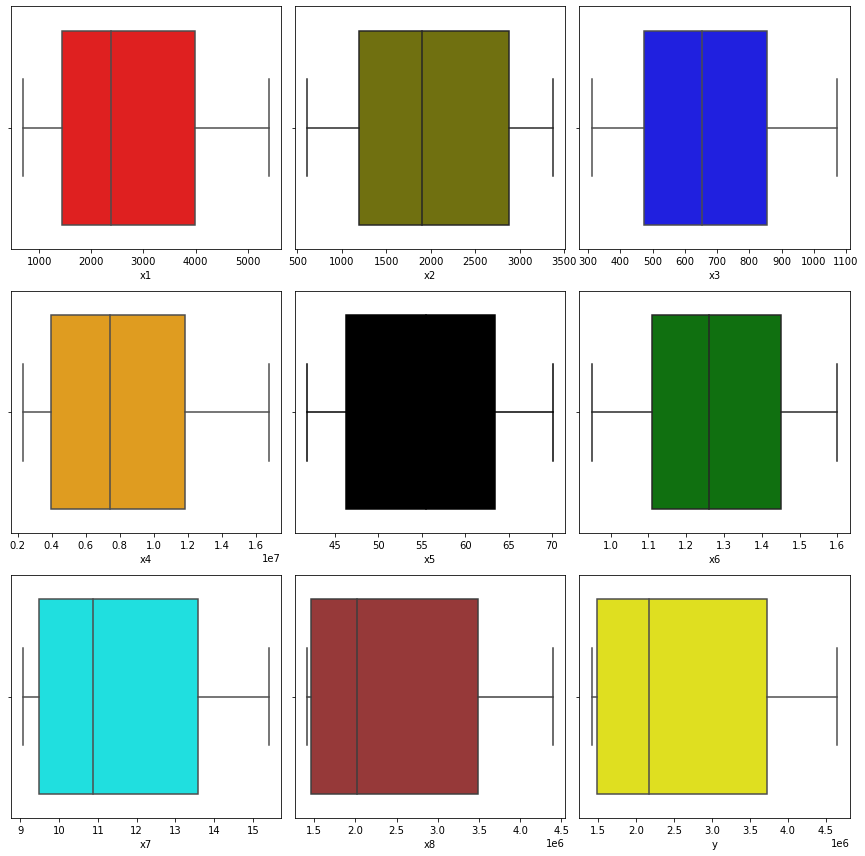

In [18]:
f, axes = plt.subplots(3, 3, figsize=(12, 12))
sns.boxplot(df1['x1'] , color="red", ax=axes[0, 0])
sns.boxplot(df1['x2'] , color="olive", ax=axes[0, 1])
sns.boxplot(df1['x3'] , color="blue", ax=axes[0, 2])
sns.boxplot(df1['x4'] , color="orange", ax=axes[1, 0])
sns.boxplot(df1['x5'] , color="black", ax=axes[1, 1])
sns.boxplot(df1['x6'] , color="green", ax=axes[1, 2])
sns.boxplot(df1['x7'] , color="cyan", ax=axes[2, 0])
sns.boxplot(df1['x8'] , color="brown", ax=axes[2, 1])
sns.boxplot(df1['y'],color="yellow", ax=axes[2,2])

plt.tight_layout()

# Relation of each parameter with y

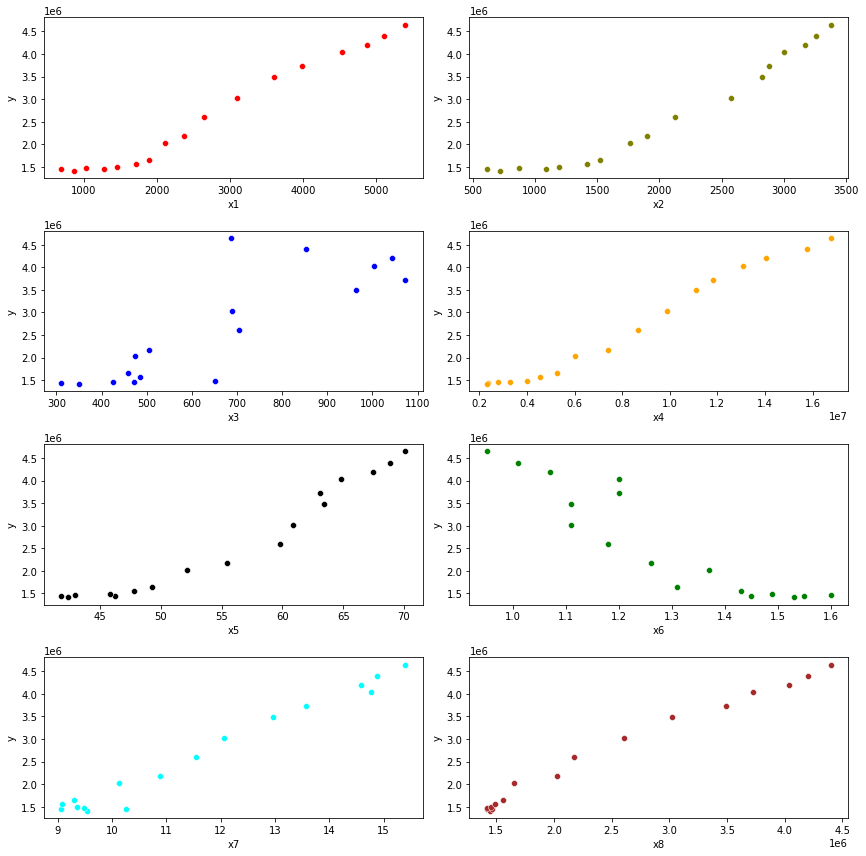

In [19]:
f, axes = plt.subplots(4, 2, figsize=(12, 12))
sns.scatterplot(df1['x1'] ,df1['y'], color="red", ax=axes[0, 0])
sns.scatterplot(df1['x2'] ,df1['y'], color="olive", ax=axes[0, 1])
sns.scatterplot(df1['x3'] , df1['y'],color="blue", ax=axes[1, 0])
sns.scatterplot(df1['x4'] , df1['y'],color="orange", ax=axes[1, 1])
sns.scatterplot(df1['x5'] , df1['y'],color="black", ax=axes[2, 0])
sns.scatterplot(df1['x6'] ,df1['y'], color="green", ax=axes[2, 1])
sns.scatterplot(df1['x7'] ,df1['y'], color="cyan", ax=axes[3, 0])
sns.scatterplot(df1['x8'] ,df1['y'], color="brown", ax=axes[3, 1])


plt.tight_layout()

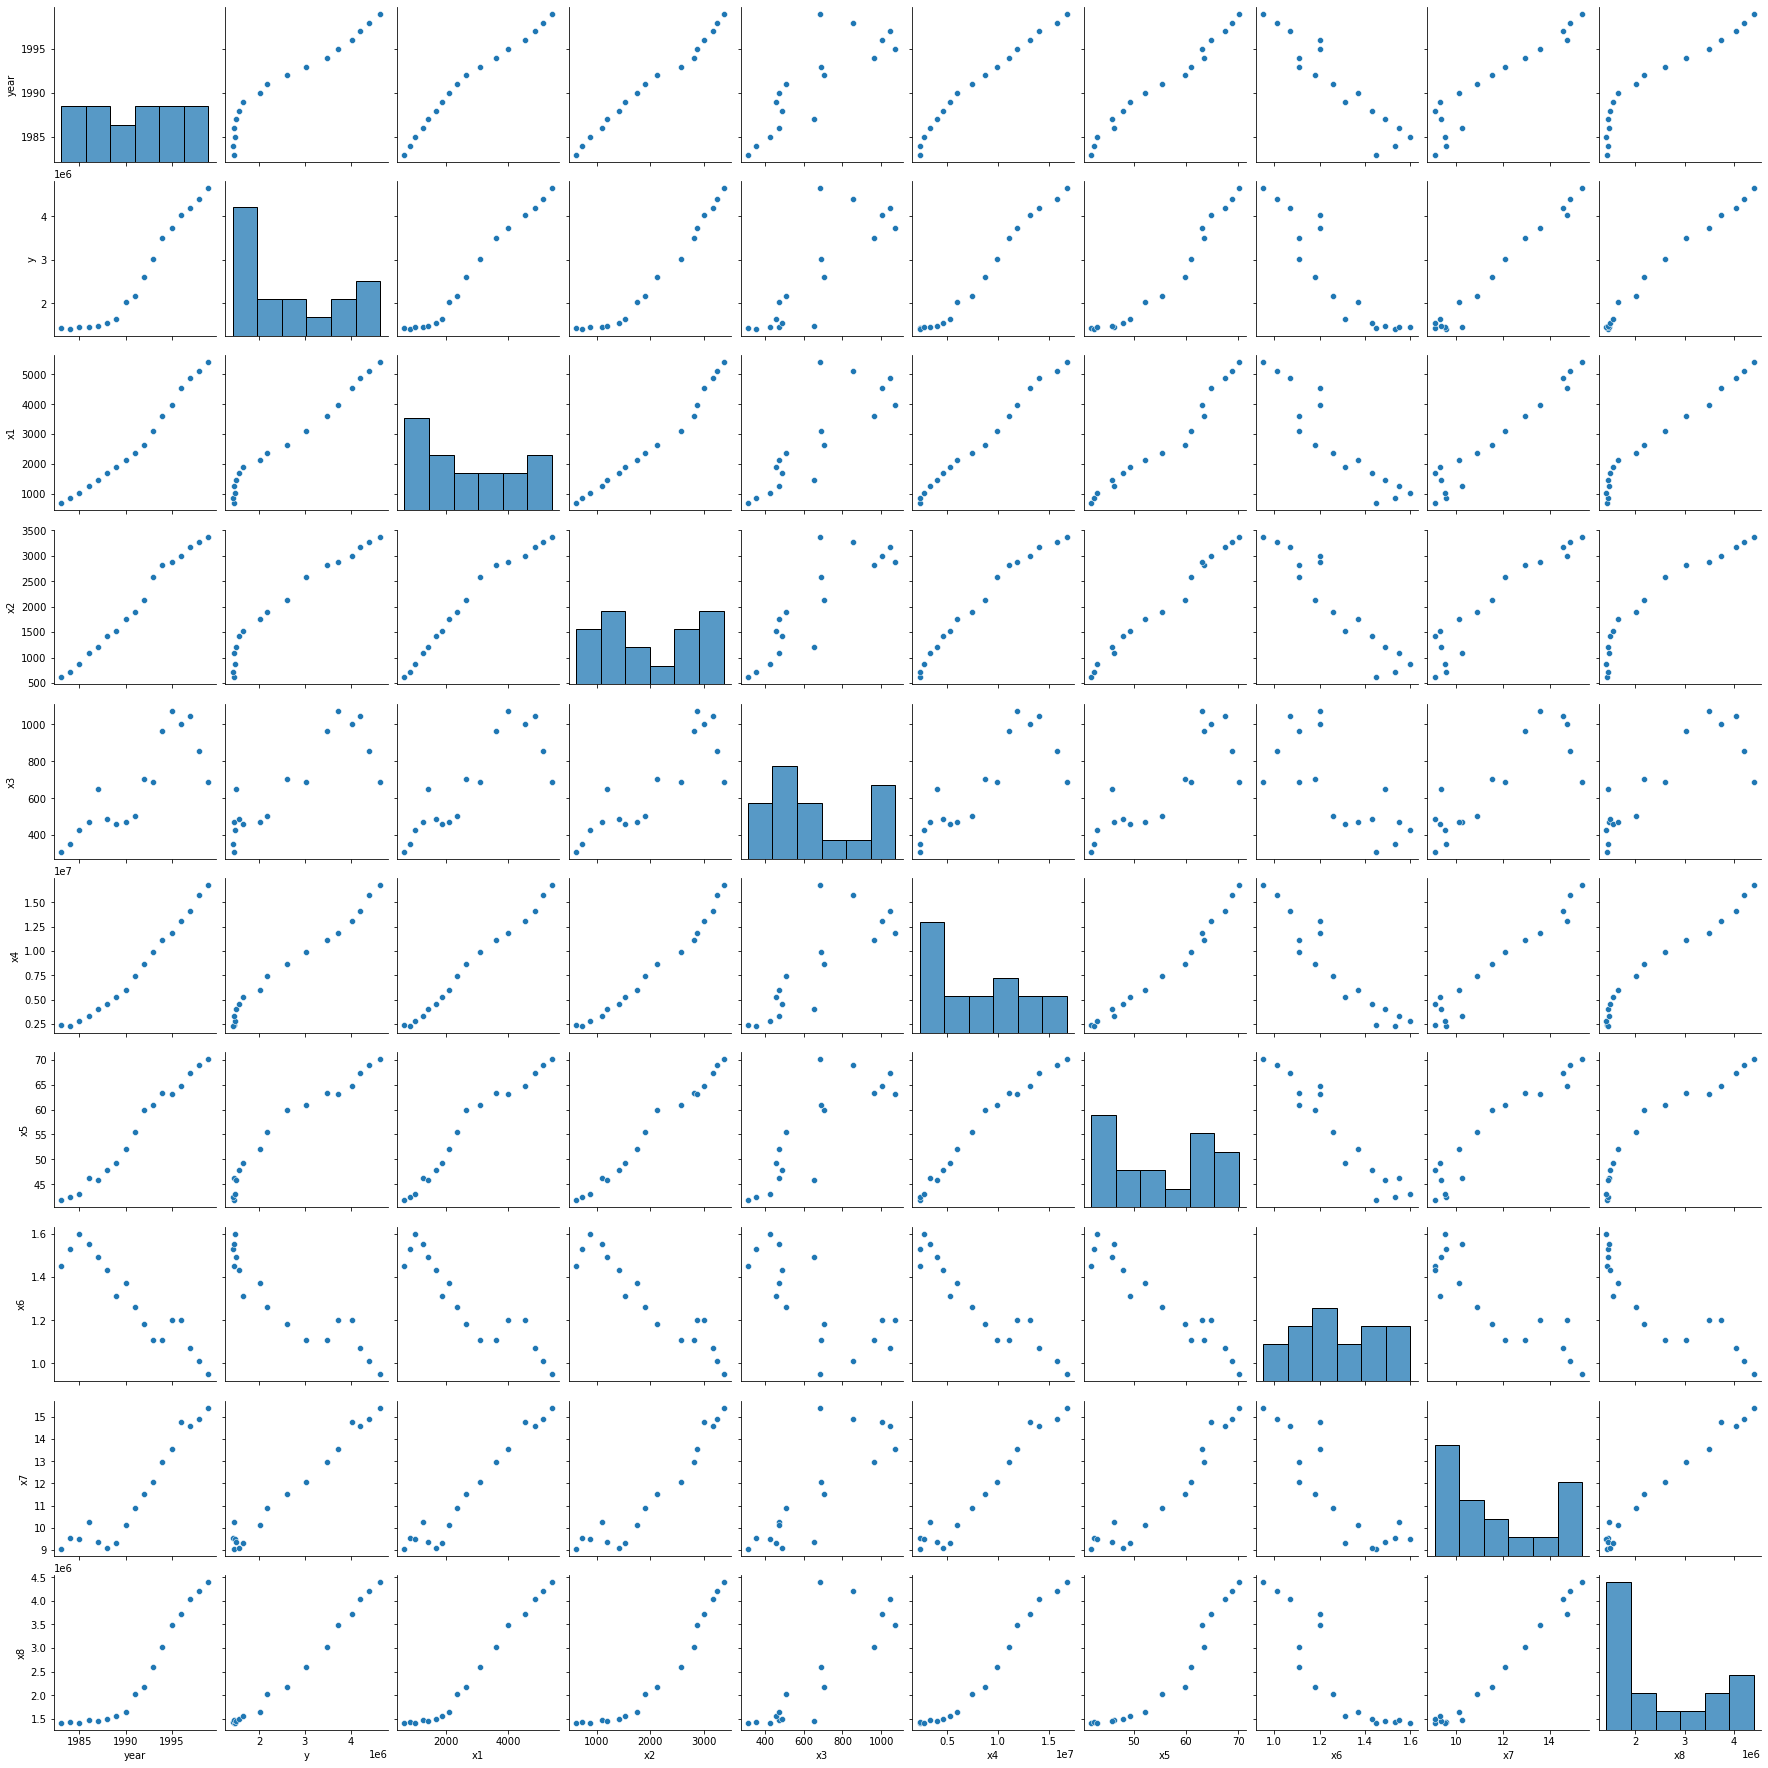

In [20]:
sns.pairplot(df1)

<AxesSubplot:>

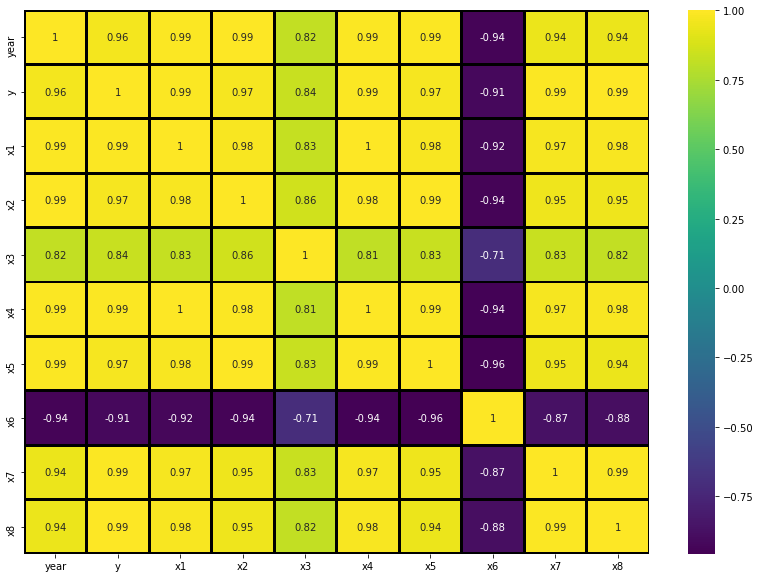

In [21]:
plt.figure(figsize=(14,10))
sns.heatmap(df1.corr(),linewidths=2, linecolor='black',cmap='viridis', annot=True)

In [22]:
from sklearn import preprocessing
#let’s normalize the input features prior to applying multilinear regression using MinMaxScaler
scalerX=preprocessing.MinMaxScaler(feature_range=(0,1)) #normalized to have a range 0 and 1
scalerX.fit(df1[['x1', 'x2', 'x3','x4','x5','x6','x7','x8']])
scalerY=preprocessing.MinMaxScaler(feature_range=(0,1)) #normalized to have a range 0 and 1
scalerY.fit(df1[['y']])

dfX_scaled=scalerX.transform(df1[['x1', 'x2', 'x3','x4','x5','x6','x7','x8']]) #will return an array
dfY_scaled=scalerY.transform(df1[['y']]) #will return an array
dfX_scaled

array([[0.        , 0.        , 0.        , 0.00490478, 0.        ,
        0.76923077, 0.        , 0.00157665],
       [0.03523668, 0.03908795, 0.05249344, 0.        , 0.01871469,
        0.89230769, 0.07424961, 0.00858772],
       [0.07195924, 0.09482447, 0.15091864, 0.0318845 , 0.03990113,
        1.        , 0.06635071, 0.        ],
       [0.12290384, 0.17191459, 0.21128609, 0.06927563, 0.15572034,
        0.92307692, 0.1864139 , 0.01640389],
       [0.16068775, 0.21172638, 0.44750656, 0.1159713 , 0.14124294,
        0.83076923, 0.04423381, 0.01251258],
       [0.21566546, 0.29134998, 0.22965879, 0.15537554, 0.21186441,
        0.73846154, 0.00157978, 0.02422006],
       [0.2553598 , 0.330076  , 0.19291339, 0.20505282, 0.26483051,
        0.55384615, 0.03791469, 0.04763502],
       [0.30227128, 0.41585233, 0.21259843, 0.25702683, 0.3654661 ,
        0.64615385, 0.16745656, 0.07886615],
       [0.35724899, 0.46724575, 0.25590551, 0.35289479, 0.48234463,
        0.47692308, 0.285939

In [23]:
df_scaled=pd.DataFrame(dfX_scaled, columns=['x1', 'x2', 'x3','x4','x5','x6','x7','x8'])
df_scaled['y']=dfY_scaled
df_scaled

,x1,x2,x3,x4,x5,x6,x7,x8,y
0,0.000000,0.000000,0.000000,0.004905,0.000000,0.769231,0.000000,0.001577,0.007920
1,0.035237,0.039088,0.052493,0.000000,0.018715,0.892308,0.074250,0.008588,0.000000
2,0.071959,0.094824,0.150919,0.031884,0.039901,1.000000,0.066351,0.000000,0.015128
3,0.122904,0.171915,0.211286,0.069276,0.155720,0.923077,0.186414,0.016404,0.011539
4,0.160688,0.211726,0.447507,0.115971,0.141243,0.830769,0.044234,0.012513,0.022336
5,0.215665,0.291350,0.229659,0.155376,0.211864,0.738462,0.001580,0.024220,0.043929
6,0.255360,0.330076,0.192913,0.205053,0.264831,0.553846,0.037915,0.047635,0.072730
7,0.302271,0.415852,0.212598,0.257027,0.365466,0.646154,0.167457,0.078866,0.187904
8,0.357249,0.467246,0.255906,0.352895,0.482345,0.476923,0.285940,0.203757,0.234710
9,0.414137,0.546869,0.517060,0.440773,0.636653,0.353846,0.390205,0.254512,0.367889


In [24]:
x_scaled=df_scaled.drop(['y'], axis=1)
#let’s define our only y features (output)
y_scaled=df_scaled['y']
x_scaled

,x1,x2,x3,x4,x5,x6,x7,x8
0,0.000000,0.000000,0.000000,0.004905,0.000000,0.769231,0.000000,0.001577
1,0.035237,0.039088,0.052493,0.000000,0.018715,0.892308,0.074250,0.008588
2,0.071959,0.094824,0.150919,0.031884,0.039901,1.000000,0.066351,0.000000
3,0.122904,0.171915,0.211286,0.069276,0.155720,0.923077,0.186414,0.016404
4,0.160688,0.211726,0.447507,0.115971,0.141243,0.830769,0.044234,0.012513
5,0.215665,0.291350,0.229659,0.155376,0.211864,0.738462,0.001580,0.024220
6,0.255360,0.330076,0.192913,0.205053,0.264831,0.553846,0.037915,0.047635
7,0.302271,0.415852,0.212598,0.257027,0.365466,0.646154,0.167457,0.078866
8,0.357249,0.467246,0.255906,0.352895,0.482345,0.476923,0.285940,0.203757
9,0.414137,0.546869,0.517060,0.440773,0.636653,0.353846,0.390205,0.254512


In [25]:
y_scaled

0     0.007920
1     0.000000
2     0.015128
3     0.011539
4     0.022336
5     0.043929
6     0.072730
7     0.187904
8     0.234710
9     0.367889
10    0.497479
11    0.642196
12    0.714184
13    0.810642
14    0.861036
15    0.922196
16    1.000000
Name: y, dtype: float64

In [26]:
df2 = df[(df['year']>1999) & (df['year']<2007)]
df2

,year,y,x1,x2,x3,x4,x5,x6,x7,x8
17,2000,4712500,5524,3497,758,16519000,71.88,0.88,15.82,4649700
18,2001,5205000,5653,3704,891,18083400,71.88,0.91,16.46,4712500
19,2002,6115500,6958,5523,1043,19267300,72.95,0.83,17.22,5205000
20,2003,7158700,8680,7805,1181,19580500,72.83,0.83,17.74,6115500
21,2004,8109500,9864,8263,1319,25365000,72.28,0.89,17.71,7158700
22,2005,9051000,11805,9522,1946,30032000,72.01,0.84,16.98,8109500
23,2006,9623000,12314,11092,2347,32987000,72.31,0.85,17.20,9051000


In [27]:
X_train = x_scaled
y_train = y_scaled

In [28]:
X_train

,x1,x2,x3,x4,x5,x6,x7,x8
0,0.000000,0.000000,0.000000,0.004905,0.000000,0.769231,0.000000,0.001577
1,0.035237,0.039088,0.052493,0.000000,0.018715,0.892308,0.074250,0.008588
2,0.071959,0.094824,0.150919,0.031884,0.039901,1.000000,0.066351,0.000000
3,0.122904,0.171915,0.211286,0.069276,0.155720,0.923077,0.186414,0.016404
4,0.160688,0.211726,0.447507,0.115971,0.141243,0.830769,0.044234,0.012513
5,0.215665,0.291350,0.229659,0.155376,0.211864,0.738462,0.001580,0.024220
6,0.255360,0.330076,0.192913,0.205053,0.264831,0.553846,0.037915,0.047635
7,0.302271,0.415852,0.212598,0.257027,0.365466,0.646154,0.167457,0.078866
8,0.357249,0.467246,0.255906,0.352895,0.482345,0.476923,0.285940,0.203757
9,0.414137,0.546869,0.517060,0.440773,0.636653,0.353846,0.390205,0.254512


In [29]:
from sklearn.linear_model import LinearRegression
np.random.seed(seed)
lm = LinearRegression() #initialize an instance of the linear model
lm.fit(X_train,y_train) #fit the lm model to the training rows
print("Linear Regression Intercept :", lm.intercept_)
coeff_df = pd.DataFrame(lm.coef_,x_scaled.columns,columns=['Coefficient'])
coeff_df

NameError: name 'seed' is not defined

In [30]:
y_prediction=lm.predict(X_train)
plt.plot(y_prediction, y_train, 'b.')
plt.xlabel('Training Prediction')
plt.ylabel('Training Actual')
plt.title('Actual Vs. Predicted Training y')

NameError: name 'lm' is not defined

In [369]:
y_prediction

array([-1.04240571e-02, -3.51125028e-03,  5.51681429e-04,  4.55046390e-02,
        3.97304231e-02,  4.29005309e-02,  8.37692212e-02,  1.45077967e-01,
        2.69303171e-01,  3.51411513e-01,  5.08399258e-01,  6.29942456e-01,
        7.22323851e-01,  7.96530192e-01,  8.57071042e-01,  9.33274237e-01,
        9.99962605e-01])

In [370]:
from sklearn import preprocessing
#let’s normalize the input features prior to applying multilinear regression using MinMaxScaler
scalerX1=preprocessing.MinMaxScaler(feature_range=(0,1)) #normalized to have a range 0 and 1
scalerX1.fit(df2[['x1', 'x2', 'x3','x4','x5','x6','x7','x8']])
scalerY1=preprocessing.MinMaxScaler(feature_range=(0,1)) #normalized to have a range 0 and 1
scalerY1.fit(df2[['y']])

dfX1_scaled=scalerX1.transform(df2[['x1', 'x2', 'x3','x4','x5','x6','x7','x8']]) #will return an array
dfY1_scaled=scalerY1.transform(df2[['y']]) #will return an array
dfX1_scaled

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.625     , 0.        , 0.        ],
       [0.01899853, 0.02725477, 0.08370044, 0.09499636, 0.        ,
        1.        , 0.33333333, 0.01426851],
       [0.21119293, 0.26675444, 0.17935809, 0.1668873 , 1.        ,
        0.        , 0.72916667, 0.12616727],
       [0.46480118, 0.56721527, 0.26620516, 0.185906  , 0.88785047,
        0.        , 1.        , 0.33303797],
       [0.63917526, 0.6275181 , 0.35305223, 0.53716298, 0.37383178,
        0.75      , 0.984375  , 0.57005885],
       [0.92503682, 0.79328506, 0.74764003, 0.82056109, 0.12149533,
        0.125     , 0.60416667, 0.78608593],
       [1.        , 1.        , 1.        , 1.        , 0.40186916,
        0.25      , 0.71875   , 1.        ]])

In [371]:
df1_scaled=pd.DataFrame(dfX1_scaled, columns=['x1', 'x2', 'x3','x4','x5','x6','x7','x8'])
df1_scaled['y']=dfY1_scaled
df1_scaled

,x1,x2,x3,x4,x5,x6,x7,x8,y
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.625,0.000000,0.000000,0.000000
1,0.018999,0.027255,0.083700,0.094996,0.000000,1.000,0.333333,0.014269,0.100295
2,0.211193,0.266754,0.179358,0.166887,1.000000,0.000,0.729167,0.126167,0.285714
3,0.464801,0.567215,0.266205,0.185906,0.887850,0.000,1.000000,0.333038,0.498157
4,0.639175,0.627518,0.353052,0.537163,0.373832,0.750,0.984375,0.570059,0.691783
5,0.925037,0.793285,0.747640,0.820561,0.121495,0.125,0.604167,0.786086,0.883515
6,1.000000,1.000000,1.000000,1.000000,0.401869,0.250,0.718750,1.000000,1.000000


In [372]:
x1_scaled=df1_scaled.drop(['y'], axis=1)
#let’s define our only y features (output)
y1_scaled=df1_scaled['y']
x1_scaled

,x1,x2,x3,x4,x5,x6,x7,x8
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.625,0.000000,0.000000
1,0.018999,0.027255,0.083700,0.094996,0.000000,1.000,0.333333,0.014269
2,0.211193,0.266754,0.179358,0.166887,1.000000,0.000,0.729167,0.126167
3,0.464801,0.567215,0.266205,0.185906,0.887850,0.000,1.000000,0.333038
4,0.639175,0.627518,0.353052,0.537163,0.373832,0.750,0.984375,0.570059
5,0.925037,0.793285,0.747640,0.820561,0.121495,0.125,0.604167,0.786086
6,1.000000,1.000000,1.000000,1.000000,0.401869,0.250,0.718750,1.000000


In [373]:
y1_scaled

0    0.000000
1    0.100295
2    0.285714
3    0.498157
4    0.691783
5    0.883515
6    1.000000
Name: y, dtype: float64

Text(0.5, 1.0, 'Actual Vs. Predicted y, Testing Data Set (2000 to 2006)')

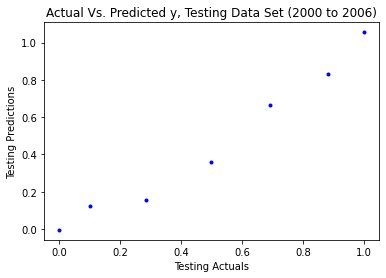

In [374]:
X_test = x1_scaled
y_test = y1_scaled

y1_pred = lm.predict(X_test)
plt.plot(y_test,y1_pred, 'b.')
plt.xlabel('Testing Actuals')
plt.ylabel('Testing Predictions')
plt.title('Actual Vs. Predicted y, Testing Data Set (2000 to 2006)')

In [375]:
y1_pred

array([-0.00489285,  0.1222496 ,  0.15739943,  0.3603372 ,  0.66256198,
        0.83389322,  1.05547168])

# 10.3

In [376]:
df3 = df[(df['year']>1982) & (df['year']<2000)]
df3

,year,y,x1,x2,x3,x4,x5,x6,x7,x8
0,1983,1442800,689,612,311,2375900,41.80,1.45,9.07,1421900
1,1984,1417200,855,720,351,2305000,42.33,1.53,9.54,1442800
2,1985,1466100,1028,874,426,2765900,42.93,1.60,9.49,1417200
3,1986,1454500,1268,1087,472,3306400,46.21,1.55,10.25,1466100
4,1987,1489400,1446,1197,652,3981400,45.80,1.49,9.35,1454500
5,1988,1559200,1705,1417,486,4551000,47.80,1.43,9.08,1489400
6,1989,1652300,1892,1524,458,5269100,49.30,1.31,9.31,1559200
7,1990,2024600,2113,1761,473,6020400,52.15,1.37,10.13,1652300
8,1991,2175900,2372,1903,506,7406200,55.46,1.26,10.88,2024600
9,1992,2606400,2640,2123,705,8676500,59.83,1.18,11.54,2175900


In [377]:
from sklearn import preprocessing
#let’s normalize the input features prior to applying multilinear regression using MinMaxScaler
scalerX2=preprocessing.MinMaxScaler(feature_range=(0,1)) #normalized to have a range 0 and 1
scalerX2.fit(df3[['x2','x4','x5','x7']])
scalerY2=preprocessing.MinMaxScaler(feature_range=(0,1)) #normalized to have a range 0 and 1
scalerY2.fit(df3[['y']])

dfX2_scaled=scalerX2.transform(df3[['x2','x4','x5','x7']]) #will return an array
dfY2_scaled=scalerY2.transform(df3[['y']]) #will return an array
dfX2_scaled

array([[0.        , 0.00490478, 0.        , 0.        ],
       [0.03908795, 0.        , 0.01871469, 0.07424961],
       [0.09482447, 0.0318845 , 0.03990113, 0.06635071],
       [0.17191459, 0.06927563, 0.15572034, 0.1864139 ],
       [0.21172638, 0.1159713 , 0.14124294, 0.04423381],
       [0.29134998, 0.15537554, 0.21186441, 0.00157978],
       [0.330076  , 0.20505282, 0.26483051, 0.03791469],
       [0.41585233, 0.25702683, 0.3654661 , 0.16745656],
       [0.46724575, 0.35289479, 0.48234463, 0.28593997],
       [0.54686934, 0.44077259, 0.63665254, 0.39020537],
       [0.71009772, 0.52401541, 0.67337571, 0.47393365],
       [0.80130293, 0.60902921, 0.76235876, 0.61453397],
       [0.82012305, 0.65911465, 0.75282486, 0.71090047],
       [0.86500181, 0.74621765, 0.81179379, 0.89889415],
       [0.92652913, 0.813411  , 0.90572034, 0.87203791],
       [0.95837857, 0.93084197, 0.9565678 , 0.9178515 ],
       [1.        , 1.        , 1.        , 1.        ]])

In [378]:
df2_scaled=pd.DataFrame(dfX2_scaled, columns=['x2','x4','x5','x7'])
df2_scaled['y']=dfY2_scaled
df2_scaled

,x2,x4,x5,x7,y
0,0.000000,0.004905,0.000000,0.000000,0.007920
1,0.039088,0.000000,0.018715,0.074250,0.000000
2,0.094824,0.031884,0.039901,0.066351,0.015128
3,0.171915,0.069276,0.155720,0.186414,0.011539
4,0.211726,0.115971,0.141243,0.044234,0.022336
5,0.291350,0.155376,0.211864,0.001580,0.043929
6,0.330076,0.205053,0.264831,0.037915,0.072730
7,0.415852,0.257027,0.365466,0.167457,0.187904
8,0.467246,0.352895,0.482345,0.285940,0.234710
9,0.546869,0.440773,0.636653,0.390205,0.367889


In [379]:
x2_scaled=df2_scaled.drop(['y'], axis=1)
#let’s define our only y features (output)
y2_scaled=df2_scaled['y']

x2_scaled

,x2,x4,x5,x7
0,0.000000,0.004905,0.000000,0.000000
1,0.039088,0.000000,0.018715,0.074250
2,0.094824,0.031884,0.039901,0.066351
3,0.171915,0.069276,0.155720,0.186414
4,0.211726,0.115971,0.141243,0.044234
5,0.291350,0.155376,0.211864,0.001580
6,0.330076,0.205053,0.264831,0.037915
7,0.415852,0.257027,0.365466,0.167457
8,0.467246,0.352895,0.482345,0.285940
9,0.546869,0.440773,0.636653,0.390205


In [380]:
y2_scaled

0     0.007920
1     0.000000
2     0.015128
3     0.011539
4     0.022336
5     0.043929
6     0.072730
7     0.187904
8     0.234710
9     0.367889
10    0.497479
11    0.642196
12    0.714184
13    0.810642
14    0.861036
15    0.922196
16    1.000000
Name: y, dtype: float64

In [381]:
X1_train = x2_scaled
y1_train = y2_scaled

X1_train

,x2,x4,x5,x7
0,0.000000,0.004905,0.000000,0.000000
1,0.039088,0.000000,0.018715,0.074250
2,0.094824,0.031884,0.039901,0.066351
3,0.171915,0.069276,0.155720,0.186414
4,0.211726,0.115971,0.141243,0.044234
5,0.291350,0.155376,0.211864,0.001580
6,0.330076,0.205053,0.264831,0.037915
7,0.415852,0.257027,0.365466,0.167457
8,0.467246,0.352895,0.482345,0.285940
9,0.546869,0.440773,0.636653,0.390205


In [382]:
from sklearn.linear_model import LinearRegression
np.random.seed(seed)
lm = LinearRegression() #initialize an instance of the linear model
lm.fit(X1_train,y1_train) #fit the lm model to the training rows
print("Linear Regression Intercept :", lm.intercept_)
coeff_df = pd.DataFrame(lm.coef_,x2_scaled.columns,columns=['Coefficient'])
coeff_df

Linear Regression Intercept : -0.05842422718953749


,Coefficient
x2,0.243947
x4,0.609640
x5,-0.282534
x7,0.502722


Text(0.5, 1.0, 'Actual Vs. Predicted Training y')

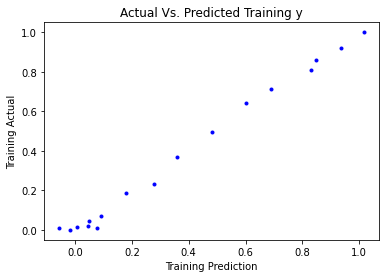

In [383]:
y1_prediction=lm1.predict(X1_train)
plt.plot(y1_prediction, y1_train, 'b.')
plt.xlabel('Training Prediction')
plt.ylabel('Training Actual')
plt.title('Actual Vs. Predicted Training y')

In [384]:
df4 = df[(df['year']>1999) & (df['year']<2007)]
df4

,year,y,x1,x2,x3,x4,x5,x6,x7,x8
17,2000,4712500,5524,3497,758,16519000,71.88,0.88,15.82,4649700
18,2001,5205000,5653,3704,891,18083400,71.88,0.91,16.46,4712500
19,2002,6115500,6958,5523,1043,19267300,72.95,0.83,17.22,5205000
20,2003,7158700,8680,7805,1181,19580500,72.83,0.83,17.74,6115500
21,2004,8109500,9864,8263,1319,25365000,72.28,0.89,17.71,7158700
22,2005,9051000,11805,9522,1946,30032000,72.01,0.84,16.98,8109500
23,2006,9623000,12314,11092,2347,32987000,72.31,0.85,17.20,9051000


In [385]:
from sklearn import preprocessing
#let’s normalize the input features prior to applying multilinear regression using MinMaxScaler
scalerX3=preprocessing.MinMaxScaler(feature_range=(0,1)) #normalized to have a range 0 and 1
scalerX3.fit(df4[['x2','x4','x5','x7']])
scalerY3=preprocessing.MinMaxScaler(feature_range=(0,1)) #normalized to have a range 0 and 1
scalerY3.fit(df4[['y']])

dfX3_scaled=scalerX3.transform(df4[['x2','x4','x5','x7']]) #will return an array
dfY3_scaled=scalerY3.transform(df4[['y']]) #will return an array
dfX3_scaled

array([[0.        , 0.        , 0.        , 0.        ],
       [0.02725477, 0.09499636, 0.        , 0.33333333],
       [0.26675444, 0.1668873 , 1.        , 0.72916667],
       [0.56721527, 0.185906  , 0.88785047, 1.        ],
       [0.6275181 , 0.53716298, 0.37383178, 0.984375  ],
       [0.79328506, 0.82056109, 0.12149533, 0.60416667],
       [1.        , 1.        , 0.40186916, 0.71875   ]])

In [386]:
df3_scaled=pd.DataFrame(dfX3_scaled, columns=['x2','x4','x5','x7'])
df3_scaled['y']=dfY3_scaled
df3_scaled

,x2,x4,x5,x7,y
0,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.027255,0.094996,0.000000,0.333333,0.100295
2,0.266754,0.166887,1.000000,0.729167,0.285714
3,0.567215,0.185906,0.887850,1.000000,0.498157
4,0.627518,0.537163,0.373832,0.984375,0.691783
5,0.793285,0.820561,0.121495,0.604167,0.883515
6,1.000000,1.000000,0.401869,0.718750,1.000000


In [387]:
x3_scaled=df3_scaled.drop(['y'], axis=1)
#let’s define our only y features (output)
y3_scaled=df3_scaled['y']
x3_scaled

,x2,x4,x5,x7
0,0.000000,0.000000,0.000000,0.000000
1,0.027255,0.094996,0.000000,0.333333
2,0.266754,0.166887,1.000000,0.729167
3,0.567215,0.185906,0.887850,1.000000
4,0.627518,0.537163,0.373832,0.984375
5,0.793285,0.820561,0.121495,0.604167
6,1.000000,1.000000,0.401869,0.718750


In [388]:
y3_scaled

0    0.000000
1    0.100295
2    0.285714
3    0.498157
4    0.691783
5    0.883515
6    1.000000
Name: y, dtype: float64

Text(0.5, 1.0, 'Actual Vs. Predicted y, Testing Data Set (2000 to 2006)')

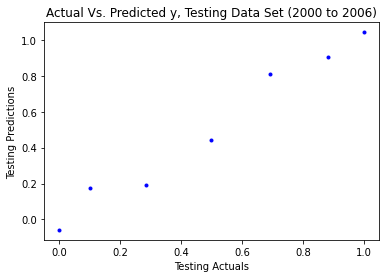

In [389]:
X1_test = x3_scaled
y1_test = y3_scaled

y3_pred = lm.predict(X1_test)
plt.plot(y1_test,y3_pred, 'b.')
plt.xlabel('Testing Actuals')
plt.ylabel('Testing Predictions')
plt.title('Actual Vs. Predicted y, Testing Data Set (2000 to 2006)')

In [390]:
y3_pred

array([-0.05842423,  0.17371223,  0.1924252 ,  0.44515648,  0.81138038,
        0.90474409,  1.04295323])

In [391]:
#Error for 8 variable model
from sklearn import metrics
print('MAE:', round(metrics.mean_absolute_error(y_test, y1_pred),5))
print('MSE:', round(metrics.mean_squared_error(y_test, y1_pred),5))
print('RMSE:', round(np.sqrt(metrics.mean_squared_error(y_test, y1_pred)),5))

MAE: 0.06104
MSE: 0.00605
RMSE: 0.07779


In [392]:
#Error for 4 variable model
from sklearn import metrics
print('MAE:', round(metrics.mean_absolute_error(y1_test, y3_pred),5))
print('MSE:', round(metrics.mean_squared_error(y1_test, y3_pred),5))
print('RMSE:', round(np.sqrt(metrics.mean_squared_error(y1_test, y3_pred)),5))

MAE: 0.06599
MSE: 0.00527
RMSE: 0.07262


The RMSE for 4 variable model is less and as a result, the 4 variable model is better.

# 10.4

In [393]:
df_new = pd.read_csv("China_Oilfield_2.csv")
df_new

,year,ynew,x2new,x4new,x5new,x7new
0,1983,1352300,407,1564500,40.96,8.92
1,1984,1326700,515,1493600,41.49,9.39
2,1985,1375600,669,1954500,42.09,9.34
3,1986,1364000,882,2495000,45.37,10.10
4,1987,1398900,992,3170000,44.96,9.20
5,1988,1468700,1212,3739600,46.96,8.93
6,1989,1561800,1319,4457700,48.46,9.16
7,1990,1934100,1556,5209000,51.31,9.98
8,1991,2085400,1698,6594800,54.62,10.73
9,1992,2515900,1918,7865100,58.99,11.39


In [394]:
df5 = df_new[(df_new['year']>1982) & (df_new['year']<2000)]
#df5

df6 = df_new[(df_new['year']>1999) & (df_new['year']<2007)]
#df6

In [395]:
df5

,year,ynew,x2new,x4new,x5new,x7new
0,1983,1352300,407,1564500,40.96,8.92
1,1984,1326700,515,1493600,41.49,9.39
2,1985,1375600,669,1954500,42.09,9.34
3,1986,1364000,882,2495000,45.37,10.10
4,1987,1398900,992,3170000,44.96,9.20
5,1988,1468700,1212,3739600,46.96,8.93
6,1989,1561800,1319,4457700,48.46,9.16
7,1990,1934100,1556,5209000,51.31,9.98
8,1991,2085400,1698,6594800,54.62,10.73
9,1992,2515900,1918,7865100,58.99,11.39


In [396]:
from sklearn import preprocessing
#let’s normalize the input features prior to applying multilinear regression using MinMaxScaler
scalerXnew=preprocessing.MinMaxScaler(feature_range=(0,1)) #normalized to have a range 0 and 1
scalerXnew.fit(df5[['x2new', 'x4new', 'x5new','x7new']])
scalerYnew=preprocessing.MinMaxScaler(feature_range=(0,1)) #normalized to have a range 0 and 1
scalerYnew.fit(df5[['ynew']])

dfX_scaled_new=scalerXnew.transform(df5[['x2new', 'x4new', 'x5new','x7new']]) #will return an array
dfY_scaled_new=scalerYnew.transform(df5[['ynew']]) #will return an array
dfX_scaled_new

array([[0.        , 0.00490478, 0.        , 0.        ],
       [0.03908795, 0.        , 0.01871469, 0.07424961],
       [0.09482447, 0.0318845 , 0.03990113, 0.06635071],
       [0.17191459, 0.06927563, 0.15572034, 0.1864139 ],
       [0.21172638, 0.1159713 , 0.14124294, 0.04423381],
       [0.29134998, 0.15537554, 0.21186441, 0.00157978],
       [0.330076  , 0.20505282, 0.26483051, 0.03791469],
       [0.41585233, 0.25702683, 0.3654661 , 0.16745656],
       [0.46724575, 0.35289479, 0.48234463, 0.28593997],
       [0.54686934, 0.44077259, 0.63665254, 0.39020537],
       [0.71986971, 0.52401541, 0.67337571, 0.47393365],
       [0.80130293, 0.60902921, 0.76235876, 0.61453397],
       [0.82012305, 0.65911465, 0.75282486, 0.71090047],
       [0.86500181, 0.74621765, 0.81179379, 0.89889415],
       [0.92652913, 0.813411  , 0.90572034, 0.87203791],
       [0.95837857, 0.93084197, 0.9565678 , 0.9178515 ],
       [1.        , 1.        , 1.        , 1.        ]])

In [397]:
df_scaled_new=pd.DataFrame(dfX_scaled_new, columns=['x2new', 'x4new', 'x5new','x7new'])
df_scaled_new['ynew']=dfY_scaled_new
df_scaled_new

,x2new,x4new,x5new,x7new,ynew
0,0.000000,0.004905,0.000000,0.000000,0.007920
1,0.039088,0.000000,0.018715,0.074250,0.000000
2,0.094824,0.031884,0.039901,0.066351,0.015128
3,0.171915,0.069276,0.155720,0.186414,0.011539
4,0.211726,0.115971,0.141243,0.044234,0.022336
5,0.291350,0.155376,0.211864,0.001580,0.043929
6,0.330076,0.205053,0.264831,0.037915,0.072730
7,0.415852,0.257027,0.365466,0.167457,0.187904
8,0.467246,0.352895,0.482345,0.285940,0.234710
9,0.546869,0.440773,0.636653,0.390205,0.367889


In [398]:
xnew_scaled=df_scaled_new.drop(['ynew'], axis=1)
#let’s define our only y features (output)
ynew_scaled=df_scaled_new['ynew']

xnew_scaled

,x2new,x4new,x5new,x7new
0,0.000000,0.004905,0.000000,0.000000
1,0.039088,0.000000,0.018715,0.074250
2,0.094824,0.031884,0.039901,0.066351
3,0.171915,0.069276,0.155720,0.186414
4,0.211726,0.115971,0.141243,0.044234
5,0.291350,0.155376,0.211864,0.001580
6,0.330076,0.205053,0.264831,0.037915
7,0.415852,0.257027,0.365466,0.167457
8,0.467246,0.352895,0.482345,0.285940
9,0.546869,0.440773,0.636653,0.390205


In [399]:
ynew_scaled

0     0.007920
1     0.000000
2     0.015128
3     0.011539
4     0.022336
5     0.043929
6     0.072730
7     0.187904
8     0.234710
9     0.367889
10    0.497479
11    0.642196
12    0.719660
13    0.810642
14    0.861036
15    0.922196
16    1.000000
Name: ynew, dtype: float64

In [400]:
Xnew_train = xnew_scaled
ynew_train = ynew_scaled

In [401]:
from sklearn.linear_model import LinearRegression
np.random.seed(seed)
lm = LinearRegression() #initialize an instance of the linear model
lm.fit(Xnew_train,ynew_train) #fit the lm model to the training rows
print("Linear Regression Intercept :", lm.intercept_)
coeff_df = pd.DataFrame(lm.coef_,xnew_scaled.columns,columns=['Coefficient'])
coeff_df

Linear Regression Intercept : -0.05900492738064961


,Coefficient
x2new,0.258042
x4new,0.604361
x5new,-0.294626
x7new,0.506624


Text(0.5, 1.0, 'Actual Vs. Predicted Training y')

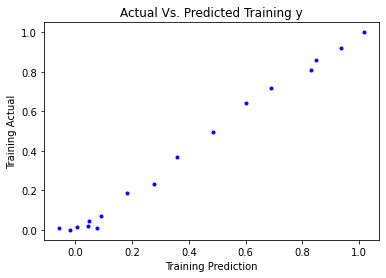

In [402]:
ynew_prediction=lm.predict(Xnew_train)
plt.plot(ynew_prediction, ynew_train, 'b.')
plt.xlabel('Training Prediction')
plt.ylabel('Training Actual')
plt.title('Actual Vs. Predicted Training y')

In [403]:
from sklearn import preprocessing
#let’s normalize the input features prior to applying multilinear regression using MinMaxScaler
scalerXnew_1=preprocessing.MinMaxScaler(feature_range=(0,1)) #normalized to have a range 0 and 1
scalerXnew_1.fit(df6[['x2new','x4new','x5new','x7new']])
scalerYnew_1=preprocessing.MinMaxScaler(feature_range=(0,1)) #normalized to have a range 0 and 1
scalerYnew_1.fit(df6[['ynew']])

dfX_scaled_new_1=scalerXnew_1.transform(df6[['x2new','x4new','x5new','x7new']]) #will return an array
dfY_scaled_new_1=scalerYnew_1.transform(df6[['ynew']]) #will return an array
dfX_scaled_new_1

array([[0.        , 0.        , 0.        , 0.        ],
       [0.02725477, 0.09499636, 0.        , 0.33333333],
       [0.26675444, 0.1668873 , 1.        , 0.72916667],
       [0.56721527, 0.185906  , 0.88785047, 1.        ],
       [0.6275181 , 0.53716298, 0.37383178, 0.984375  ],
       [0.79328506, 0.82056109, 0.12149533, 0.60416667],
       [1.        , 1.        , 0.40186916, 0.48958333]])

In [404]:
df_scaled_new_1=pd.DataFrame(dfX_scaled_new_1, columns=['x2new','x4new','x5new','x7new'])
df_scaled_new_1['ynew']=dfY_scaled_new_1
df_scaled_new_1

,x2new,x4new,x5new,x7new,ynew
0,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.027255,0.094996,0.000000,0.333333,0.100295
2,0.266754,0.166887,1.000000,0.729167,0.285714
3,0.567215,0.185906,0.887850,1.000000,0.498157
4,0.627518,0.537163,0.373832,0.984375,0.691783
5,0.793285,0.820561,0.121495,0.604167,0.883515
6,1.000000,1.000000,0.401869,0.489583,1.000000


In [405]:
xnew_scaled_1=df_scaled_new_1.drop(['ynew'], axis=1)
#let’s define our only y features (output)
ynew_scaled_1=df_scaled_new_1['ynew']
xnew_scaled_1

,x2new,x4new,x5new,x7new
0,0.000000,0.000000,0.000000,0.000000
1,0.027255,0.094996,0.000000,0.333333
2,0.266754,0.166887,1.000000,0.729167
3,0.567215,0.185906,0.887850,1.000000
4,0.627518,0.537163,0.373832,0.984375
5,0.793285,0.820561,0.121495,0.604167
6,1.000000,1.000000,0.401869,0.489583


In [406]:
ynew_scaled_1

0    0.000000
1    0.100295
2    0.285714
3    0.498157
4    0.691783
5    0.883515
6    1.000000
Name: ynew, dtype: float64

Text(0.5, 1.0, 'Actual Vs. Predicted y, Testing Data Set (2000 to 2006)')

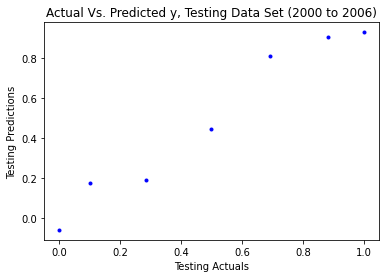

In [407]:
Xnew_test = xnew_scaled_1
ynew_test = ynew_scaled_1

ynew_pred = lm1.predict(Xnew_test)
plt.plot(ynew_test,ynew_pred, 'b.')
plt.xlabel('Testing Actuals')
plt.ylabel('Testing Predictions')
plt.title('Actual Vs. Predicted y, Testing Data Set (2000 to 2006)')

In [408]:
#Error for new dataset model
from sklearn import metrics
print('MAE:', round(metrics.mean_absolute_error(ynew_test, ynew_pred),5))
print('MSE:', round(metrics.mean_squared_error(ynew_test, ynew_pred),5))
print('RMSE:', round(np.sqrt(metrics.mean_squared_error(ynew_test, ynew_pred)),5))

MAE: 0.07017
MSE: 0.00576
RMSE: 0.07587


The RMSE of the new model from the new dataset is a bit less than that of the old dataset 4 variable model. Hence, the new model is better.

# Section C

In [409]:
url = "http://www.statsci.org/data/general/harvest.txt"

df9 = pd.read_table(url, sep="\t", engine='python')

In [410]:
df9

,Smoke,Sport,SBPCB,DBPCB,HRCB,SBPAB,DBPAB,HRAB,SBPA3,DBPA3,...,DBPCE,HRCE,SBPAE,DBPAE,HRAE,AgeB,BMIB,EndPoint,Time,Male
0,0,0,152.00,98.00,80.67,133.13,83.80,71.18,129.56,81.21,...,.,.,.,.,.,24,22.694,0,80,1
1,2,2,153.33,96.33,99.67,130.60,73.25,70.42,.,.,...,.,.,.,.,.,42,26.644,0,73,0
2,1,0,149.33,103.67,73,116.34,84.95,76.85,.,.,...,.,.,.,.,.,28,22.266,0,80,0
3,0,2,149.33,92.00,74,104.99,74.33,76.05,115.48,77.91,...,.,.,.,.,.,44,23.951,0,80,1
4,0,2,158.00,105.00,73.33,115.26,77.97,81.47,118.07,79.44,...,.,.,.,.,.,36,22.234,0,80,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,0,0,140.67,94.67,80,128.18,90.15,82.80,125.73,84.45,...,102.67,70,135.21,91.54,84.55,45,28.68,1,29,1
1096,0,0,157.33,103.67,103.33,136.29,97.87,70.34,.,.,...,118.33,98,171.36,111.46,90.98,39,22.985,1,54,1
1097,0,0,138.67,93.33,73.17,112.08,73.11,70.34,134.53,91.79,...,108,69,174.27,103.76,87.06,47,24.465,1,.,0
1098,0,0,148.00,92.00,66,144.78,81.91,60.22,152.72,86.17,...,101.67,78.33,145.38,84.38,64.39,50,27.291,1,.,1


In [411]:
df9.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100 entries, 0 to 1099
Data columns (total 28 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Smoke     1100 non-null   object 
 1   Sport     1100 non-null   object 
 2   SBPCB     1100 non-null   float64
 3   DBPCB     1100 non-null   float64
 4   HRCB      1100 non-null   object 
 5   SBPAB     1100 non-null   float64
 6   DBPAB     1100 non-null   float64
 7   HRAB      1100 non-null   float64
 8   SBPA3     1100 non-null   object 
 9   DBPA3     1100 non-null   object 
 10  HRA3      1100 non-null   object 
 11  SBPC5     1100 non-null   object 
 12  DBPC5     1100 non-null   object 
 13  HRC5      1100 non-null   object 
 14  SBPA5     1100 non-null   object 
 15  DBPA5     1100 non-null   object 
 16  HRA5      1100 non-null   object 
 17  SBPCE     1100 non-null   object 
 18  DBPCE     1100 non-null   object 
 19  HRCE      1100 non-null   object 
 20  SBPAE     1100 non-null   obje

In [412]:
df9 = df9[df9.Sport != '.']

In [413]:
df9.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1088 entries, 0 to 1099
Data columns (total 28 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Smoke     1088 non-null   object 
 1   Sport     1088 non-null   object 
 2   SBPCB     1088 non-null   float64
 3   DBPCB     1088 non-null   float64
 4   HRCB      1088 non-null   object 
 5   SBPAB     1088 non-null   float64
 6   DBPAB     1088 non-null   float64
 7   HRAB      1088 non-null   float64
 8   SBPA3     1088 non-null   object 
 9   DBPA3     1088 non-null   object 
 10  HRA3      1088 non-null   object 
 11  SBPC5     1088 non-null   object 
 12  DBPC5     1088 non-null   object 
 13  HRC5      1088 non-null   object 
 14  SBPA5     1088 non-null   object 
 15  DBPA5     1088 non-null   object 
 16  HRA5      1088 non-null   object 
 17  SBPCE     1088 non-null   object 
 18  DBPCE     1088 non-null   object 
 19  HRCE      1088 non-null   object 
 20  SBPAE     1088 non-null   obje

# 11.1

I would be using Chi-Squared test to test this association.

# 11.2

In [416]:
from scipy.stats import chisquare
from scipy.stats import chi2_contingency

sport_CT=pd.crosstab(df9['Sport'],df9['Male'])
sportgender_chi2=chi2_contingency(sport_CT,correction=False)
print("Observed Counts")
print(sport_CT)
print("Expected Counts")
print(sportgender_chi2[3])
print("Chi-Square")
print(sportgender_chi2[0])
print("p-value")
print(sportgender_chi2[1])

Observed Counts
Male     0    1
Sport          
0      241  455
1       38  123
2       21  134
3        2   74
Expected Counts
[[193.19117647 502.80882353]
 [ 44.68933824 116.31066176]
 [ 43.02389706 111.97610294]
 [ 21.09558824  54.90441176]]
Chi-Square
57.295398488003656
p-value
2.222557457564394e-12


The value of Chi-Square is 57.295398488003656

# 11.3

The p-value of the statistic is 2.222557457564394e-12

# 11.4

The p-value from Chi-square statistic is LESS THAN 0.05 therefore we assume there is statistically significance association between sport and gender.

# 11.5

Yes, the statistical assumption of the test is met as both gender and sport are categorical variables.